In [2]:
from Helper import *
from DataAnalysis import DataAnalysis
import numpy as np
import re
from ast import literal_eval
import matplotlib.pyplot as plt
import uproot as up
import pandas as pd

In [3]:
data = DataAnalysis()
data.load_eventdf('data/new_moo/8-5/events.csv')
data.load_clusterdf('data/new_moo/8-5/clusters.csv')

data.filter_fit(3.5,5)

In [4]:
sum(up.open("./data/geant/proton_TeO2_10M.root")['15;1'].values())

9999985.0

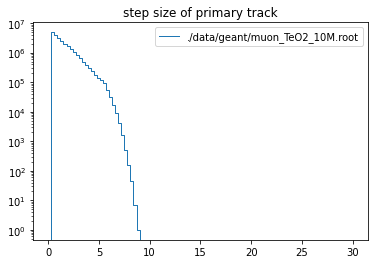

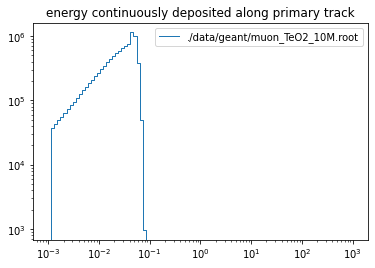

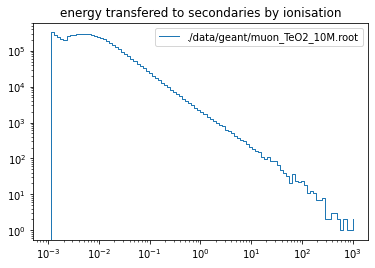

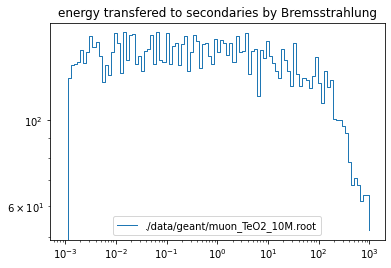

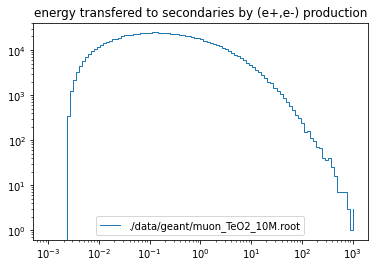

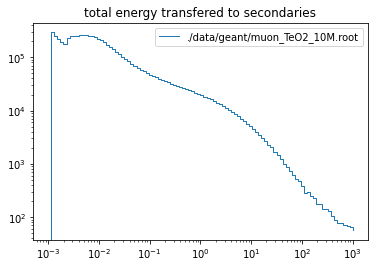

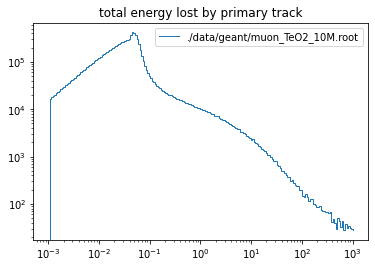

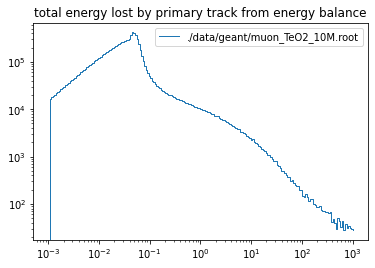

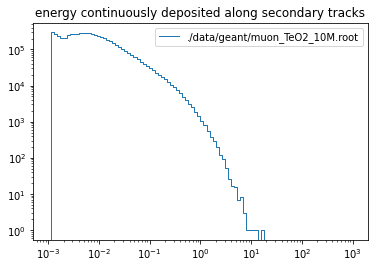

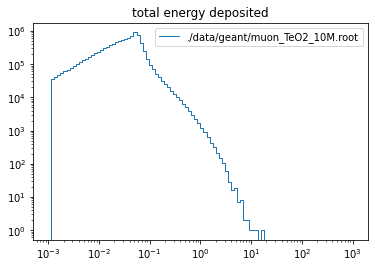

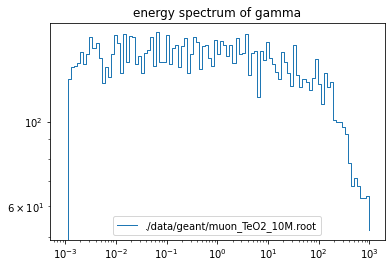

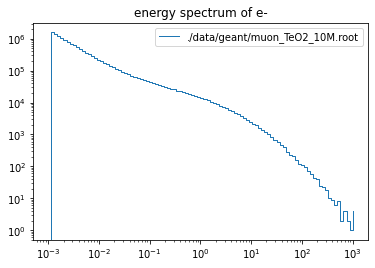

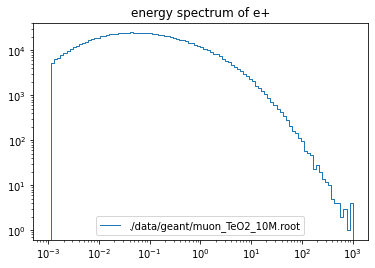

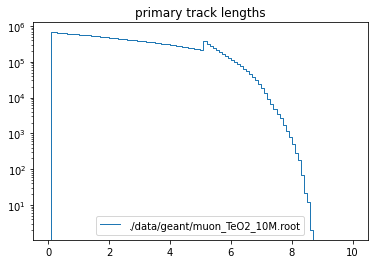

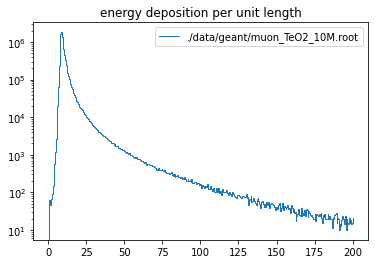

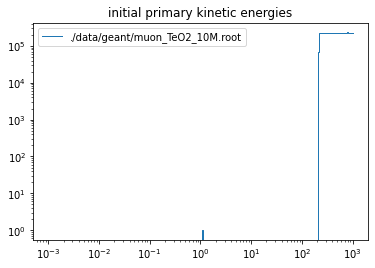

In [5]:
#files = ["./data/geant/penelope_Cu_5m_1TeV.root", "./data/geant/penelope_Cu_5m_100GeV.root"]
#files = ["./data/geant/old/penelope_1TeV.root", "./data/geant/old/penelope_100GeV.root"]
#files = ["./data/geant/muon_1TeV_TeO2_5cm.root", "./data/geant/muon_100GeV_TeO2_5cm.root"]
files = ["./data/geant/muon_TeO2_10M.root"]
#files = ["./data/geant/muon_TeO2_10M.root", "./data/geant/proton_TeO2_10M.root", "./data/geant/pi+_TeO2_10M.root"]
#files = ["./data/geant/mu-.root", "./data/geant/pi-.root", "./data/geant/proton.root"]
compare = [up.open(f) for f in files]
# for f in files:
#     up.open(f)

for k in compare[0].keys():
    for i in range(len(files)):
        hist = compare[i]
        plt.step(hist[k].axis().edges(), np.append([0], hist[k].values()), where='post', linewidth=1, label=files[i])
    plt.title(hist[k].title)
    plt.yscale('log')
    plt.legend()
    
    if k not in ['1;1', '14;1', '15;1', '17;1', '18;1', '19;1']:
       plt.xscale('log')
    
    plt.show()

In [8]:
# bins = compare[0]['15;1'].axis().edges()
# values = compare[0]['15;1'].values()

# with open("./data/pdf/bins_dEdx_muon.csv", "w") as f:
#     np.savetxt(f, bins, delimiter=",")
# with open("./data/pdf/values_dEdx_muon.csv", "w") as f:
#     np.savetxt(f, values, delimiter=",")

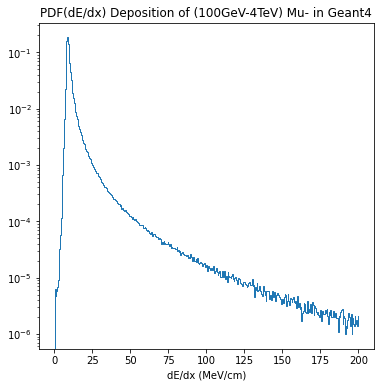

In [26]:
tree = up.open("./data/geant/muon_TeO2_10M.root")
k = '15;1'
edges = tree[k].axis().edges()
values = tree[k].values()

plt.figure(figsize=(6,6))
plt.title("PDF(dE/dx) Deposition of (100GeV-4TeV) Mu- in Geant4")
# plt.ylabel("Counts")
# plt.xlabel("track length (cm)")
#array = plt.bar(bar_points, values, width = width, fill=False)
plt.step(edges, np.append([0], values / sum(values)), where='post', linewidth=1)
plt.yscale('log')
plt.xlabel("dE/dx (MeV/cm)")
# plt.xscale('log')
plt.show()

#print(bar_points, values)

In [18]:
values

array([6.200000e+01, 4.700000e+01, 5.900000e+01, 6.700000e+01,
       9.100000e+01, 1.500000e+02, 3.220000e+02, 5.780000e+02,
       1.155000e+03, 2.607000e+03, 6.707000e+03, 1.983800e+04,
       6.463600e+04, 2.255470e+05, 7.274560e+05, 1.599923e+06,
       1.828023e+06, 1.393632e+06, 9.441980e+05, 6.389630e+05,
       4.469850e+05, 3.260080e+05, 2.456500e+05, 1.912890e+05,
       1.530020e+05, 1.249550e+05, 1.030190e+05, 8.756800e+04,
       7.446600e+04, 6.429700e+04, 5.632800e+04, 4.887000e+04,
       4.345100e+04, 3.853200e+04, 3.428700e+04, 3.058200e+04,
       2.766800e+04, 2.498300e+04, 2.308100e+04, 2.105900e+04,
       1.923200e+04, 1.788000e+04, 1.663200e+04, 1.531700e+04,
       1.433100e+04, 1.345100e+04, 1.250200e+04, 1.157800e+04,
       1.068800e+04, 9.931000e+03, 9.315000e+03, 8.923000e+03,
       8.478000e+03, 7.793000e+03, 7.321000e+03, 7.047000e+03,
       6.589000e+03, 6.246000e+03, 5.996000e+03, 5.559000e+03,
       5.269000e+03, 5.048000e+03, 4.762000e+03, 4.4790

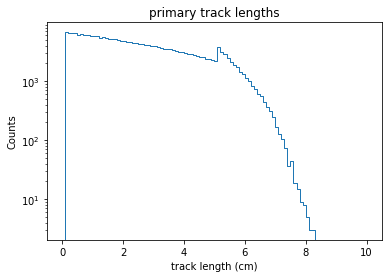

In [515]:
edges = tree['14;1'].axis().edges()
values = tree['14;1'].values()

plt.title(tree['14;1'].title)
plt.ylabel("Counts")
plt.xlabel("track length (cm)")
#array = plt.bar(bar_points, values, width = width, fill=False)
plt.step(edges, np.append([0], values), where='post', linewidth=1)
plt.yscale('log')
plt.show()
#print(bar_points, values)

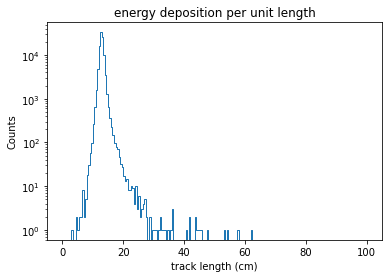

In [516]:
edges = tree['15;1'].axis().edges()
values = tree['15;1'].values()

plt.title(tree['15;1'].title)
plt.ylabel("Counts")
plt.xlabel("track length (cm)")
#array = plt.bar(bar_points, values, width = width, fill=False)
plt.step(edges, np.append([0], values), where='post', linewidth=1)
plt.yscale('log')
plt.show()
#print(bar_points, values)

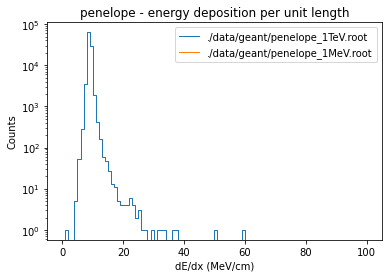

In [489]:
compare = ['./data/geant/penelope_1TeV.root', './data/geant/penelope_1MeV.root']

plt.title("penelope - energy deposition per unit length")
plt.xlabel("dE/dx (MeV/cm)")
plt.ylabel("Counts")
plt.yscale('log')


for f in compare:

    hist = up.open(f)['15;1']
    edges = hist.axis().edges()
    values = hist.values()

    plt.step(edges, np.append([0], values), where='post', linewidth=1, label=f)
    plt.legend()
#     plt.show()

In [171]:
def build_df():
    tree = up.open("./data/geant4_test.root")['T']
    
    dfs = []
    for k in tree.keys():
#         array = tree[k]
#         if type(array[0]) == np.ndarray:
#             dfs.append(pd.DataFrame(np.array(array), columns=[k.decode("utf-8") ]))
#         else:
#             dfs.append(pd.DataFrame(np.array(array)))
        branch = tree[k]
        if isinstance(branch, up.models.TBranch.Model_TBranch_v13):
            #dfs.append(branch.array(library="pd"))
            dfs.append(pd.DataFrame(tree[k].array(library='np')))
            #print(branch.array(library="pd"))
        else:
            dfs.append(pd.DataFrame(branch.array(library="np"), columns=[k]))
    return pd.concat(dfs, axis=1)

In [228]:
df = build_df()
df = df.drop(0)

In [229]:
df

,Edep,KE_i,KE_f,Mvec_i,Mvec_f,Pvec_i,Pvec_f,Muons,Electrons,Positrons,Gammas,Other
1,46.676206,4.766068e+05,4.765601e+05,"[-0.03621493096894713, -0.08811986606814279, -...","[-0.0360796588645523, -0.08810125812010022, -0...","[16.874006718742244, -7.188996696354696, 25.0]","[15.056034809712706, -11.614001507520468, -25.0]",1,3,0,0,0
2,18.723285,4.088516e+05,4.088323e+05,"[0.8072531728241551, 0.5118198834065653, -0.29...","[0.8072472482355533, 0.5118324983749759, -0.29...","[-5.615944347048636, 16.983886465088787, 25.0]","[7.027351861366402, 25.0, 20.396724426855226]",1,4,0,2,0
3,49.086445,4.242320e+05,4.241829e+05,"[-0.0021198172599941876, 0.5087345223394355, -...","[-0.00218503002244043, 0.5087736643389881, -0....","[22.367437287397465, -16.323325307473148, 25.0]","[22.24341877346876, 13.224197756638679, -25.0]",1,5,0,1,0
4,15.064617,2.797695e+06,2.797680e+06,"[-0.6643176377373599, -0.4446706170905417, -0....","[-0.6643158694562176, -0.4446780775059189, -0....","[8.876572687516244, -16.499074785607547, 25.0]","[-3.823422184996941, -25.0, 13.514461635814316]",1,0,0,0,0
5,40.978561,1.000000e+03,9.586402e+02,"[0.9093745197477361, -0.003527766924621263, -0...","[0.9077886065355514, -0.01740767783553255, -0....","[-18.47548047118891, 5.887555301760905, 25.0]","[25.0, 5.569693267314318, 4.8630877200554]",1,7,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6015,77.182093,3.051930e+06,3.051613e+06,"[0.63958461789877, -0.35520209534147906, -0.68...","[0.6395758101589941, -0.3552000998421873, -0.6...","[-13.253742872843782, 24.353051140554115, 25.0]","[25.0, 3.108301679396467, -15.775113883221078]",1,20,1,9,0
6016,2.411752,1.392426e+06,1.392424e+06,"[-0.8499401029746947, 0.472246856471181, -0.23...","[-0.8499408060090798, 0.47224688540937754, -0....","[-22.368613026589234, -21.112732539082305, 25.0]","[-25.0, -19.650671598548655, 24.276677500899947]",1,0,0,0,0
6017,2.810997,1.708653e+06,1.708650e+06,"[-0.5867833824031218, -0.4149466560664428, -0....","[-0.5867790582165054, -0.4149481551298431, -0....","[-23.289694722256975, -23.677334110438487, 25.0]","[-25.0, -24.886784611483353, 22.97326902245779]",1,0,0,0,0
6018,35.087499,9.048215e+05,9.047864e+05,"[-0.5140414932925528, 0.17576400646177576, -0....","[-0.5140470816596154, 0.17577592974690323, -0....","[18.560662430032608, 17.57873718485, 25.0]","[-3.14345900957408, 25.0, -10.448435069533868]",1,4,0,1,0


Text(0, 0.5, 'Occurance')

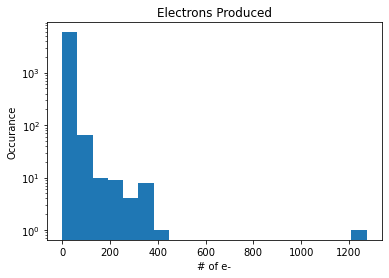

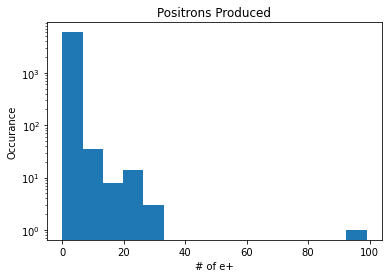

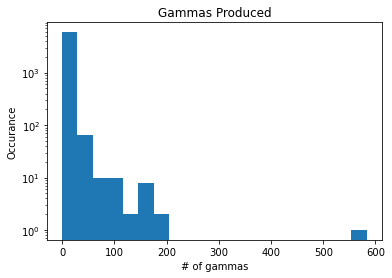

In [230]:
plt.hist(df["Electrons"], bins=20)
plt.yscale("log")
plt.title("Electrons Produced")
plt.xlabel("# of e-")
plt.ylabel("Occurance")

plt.figure()

plt.hist(df["Positrons"], bins=15)
plt.yscale("log")
plt.title("Positrons Produced")
plt.xlabel("# of e+")
plt.ylabel("Occurance")

plt.figure()

plt.hist(df["Gammas"], bins=20)
plt.yscale("log")
plt.title("Gammas Produced")
plt.xlabel("# of gammas")
plt.ylabel("Occurance")

In [231]:
len(df['KE_i'].values - df['KE_f'].values - df['Edep'].values)

6019

Text(0, 0.5, 'Occurance')

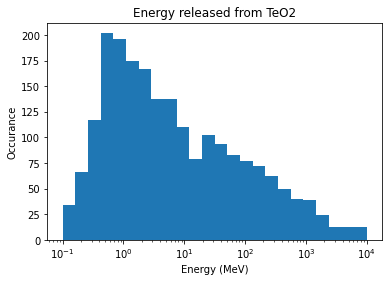

In [232]:
plt.hist(df['KE_i'].values - df['KE_f'].values - df['Edep'].values, np.logspace(-1,4,25))
#plt.yscale('log')
plt.xscale('log')

plt.title("Energy released from TeO2")
plt.xlabel("Energy (MeV)")
plt.ylabel("Occurance")

In [233]:
df[df['Positrons'] > 0]

,Edep,KE_i,KE_f,Mvec_i,Mvec_f,Pvec_i,Pvec_f,Muons,Electrons,Positrons,Gammas,Other
31,157.487956,1.356849e+06,1.356564e+06,"[-0.5825560900512925, 0.21504251214741127, -0....","[-0.5825822534510362, 0.21501795120166306, -0....","[22.9887044304063, -19.4058824080908, 25.0]","[-14.17290858206141, -5.68973326287358, -25.0]",1,54,2,26,0
36,73.672936,4.208325e+05,4.207262e+05,"[-0.9839316284252783, -0.16696725881857113, -0...","[-0.9839296798952758, -0.16705667242602057, -0...","[23.361932270359617, 0.3885073370526122, 25.0]","[-25.0, -7.819325208160703, 21.89361164215737]",1,20,1,8,0
37,53.707938,3.345941e+06,3.345887e+06,"[-0.37071655305206536, 0.922828045119339, -0.1...","[-0.37071032668881987, 0.9228308033493702, -0....","[4.219147536370276, -23.826825199853463, 25.0]","[-15.395355968854544, 25.0, 19.46144494026653]",1,12,1,5,0
55,39.893737,2.245085e+06,2.245041e+06,"[0.5213899376471434, -0.6890375671844949, -0.5...","[0.5213872692801041, -0.6890388775813387, -0.5...","[8.039586132297387, 21.204612435262646, 25.0]","[25.0, -1.2092326533299964, 8.625854766288205]",1,12,1,5,0
63,73.030239,8.519449e+05,8.518422e+05,"[0.6040897322208031, 0.15702096204946142, -0.7...","[0.6040997824727449, 0.15700439084332085, -0.7...","[-18.19751273713182, 1.5860463361175015, 25.0]","[20.462044283351474, 11.634259731854371, -25.0]",1,11,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5983,119.758807,2.306134e+05,2.301848e+05,"[0.9398634260444282, 0.19273747836828137, -0.2...","[0.9398672788042078, 0.19266602074558706, -0.2...","[-3.1100425042061346, -18.105409368147093, 25.0]","[25.0, -12.3435205587783, 16.566697127447725]",1,44,3,22,0
5989,73.734946,9.069473e+05,9.045951e+05,"[0.0889757704615002, -0.5086310246486788, -0.8...","[0.08898817297774292, -0.5085978668169194, -0....","[6.660851038171543, 2.819559379291338, 25.0]","[11.527900367249144, -25.0, -21.841027443604574]",1,17,2,5,0
5990,127.587438,2.092451e+05,2.090526e+05,"[0.5573509631230835, -0.1471831492843857, -0.8...","[0.5572504170103982, -0.1474880030226975, -0.8...","[-14.654319759964762, -15.048988672691536, 25.0]","[19.443835164623092, -24.063131311734498, -25.0]",1,46,2,20,0
6011,101.332199,3.422597e+06,3.422363e+06,"[0.47876177115656177, 0.8683078947980096, -0.1...","[0.47876859318501214, 0.8683028625206332, -0.1...","[4.24771587633294, -24.82810011802661, 25.0]","[25.0, 12.808381128826, 19.37697814267009]",1,35,1,18,0


In [234]:
df[300000 - df['KE_f'] - df['Edep'] > 1e3]

,Edep,KE_i,KE_f,Mvec_i,Mvec_f,Pvec_i,Pvec_f,Muons,Electrons,Positrons,Gammas,Other
5,40.978561,1000.000000,958.640191,"[0.9093745197477361, -0.003527766924621263, -0...","[0.9077886065355514, -0.01740767783553255, -0....","[-18.47548047118891, 5.887555301760905, 25.0]","[25.0, 5.569693267314318, 4.8630877200554]",1,7,0,2,0
10,40.978561,1000.000000,958.640191,"[0.9093745197477361, -0.003527766924621263, -0...","[0.9077886065355514, -0.01740767783553255, -0....","[-18.47548047118891, 5.887555301760905, 25.0]","[25.0, 5.569693267314318, 4.8630877200554]",1,7,0,2,0
15,40.978561,1000.000000,958.640191,"[0.9093745197477361, -0.003527766924621263, -0...","[0.9077886065355514, -0.01740767783553255, -0....","[-18.47548047118891, 5.887555301760905, 25.0]","[25.0, 5.569693267314318, 4.8630877200554]",1,7,0,2,0
20,40.978561,1000.000000,958.640191,"[0.9093745197477361, -0.003527766924621263, -0...","[0.9077886065355514, -0.01740767783553255, -0....","[-18.47548047118891, 5.887555301760905, 25.0]","[25.0, 5.569693267314318, 4.8630877200554]",1,7,0,2,0
27,26.216706,235903.626709,235876.996398,"[-0.2449326987200748, 0.8396102521761777, -0.4...","[-0.24484242114919974, 0.8396286400317928, -0....","[13.62615969613379, -1.1478417132021832, 25.0]","[5.9991800176124315, 25.0, 9.901215817221154]",1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5979,4.857370,262193.765242,262188.907872,"[-0.7629805963164598, -0.3977867068708855, -0....","[-0.7630058904402448, -0.39775700154058824, -0...","[-20.26855225618997, 17.128305434260803, 25.0]","[-25.0, 14.661523151948035, 21.84023390532042]",1,0,0,0,0
5980,16.958528,289457.759580,289440.801052,"[0.8764411535162558, -0.2598276523501247, -0.4...","[0.87638196269001, -0.2599205172200336, -0.405...","[5.346505908209277, -3.693122606891709, 25.0]","[25.0, -9.519550553434177, 15.909467856777772]",1,0,0,0,0
5983,119.758807,230613.358068,230184.803120,"[0.9398634260444282, 0.19273747836828137, -0.2...","[0.9398672788042078, 0.19266602074558706, -0.2...","[-3.1100425042061346, -18.105409368147093, 25.0]","[25.0, -12.3435205587783, 16.566697127447725]",1,44,3,22,0
5984,4.070832,234437.848075,234433.777243,"[-0.48944023685306637, 0.6381100281286715, -0....","[-0.48943654027490213, 0.6381321290292191, -0....","[2.160206497249977, 21.952503358079667, 25.0]","[-0.17727044634954536, 25.0, 22.161445332345373]",1,0,0,0,0


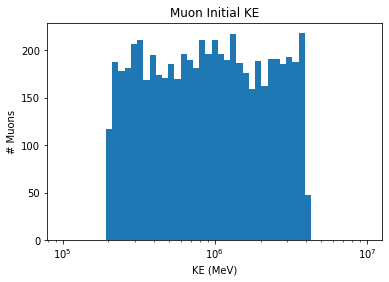

In [257]:
plt.title('Muon Initial KE')
plt.ylabel("# Muons")
plt.xlabel("KE (MeV)")
array = plt.hist(df['KE_i'], np.logspace(5,7,50))
plt.xscale('log')
#plt.yscale('log')
#plt.xlim(1e5,1e8)

In [236]:
path_lengths = []
for p, v in zip(df['Pvec_i'].values, df['Mvec_i'].values):
    collision = linecubecollision([0,0,0], 50, v, p)
    path_lengths.append(np.linalg.norm(collision[1] - collision[0]))

Text(0.5, 0, 'Path lenghts (mm)')

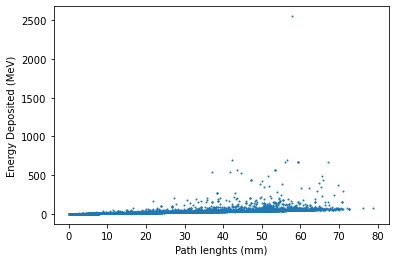

In [237]:
plt.scatter(path_lengths, df['Edep'], s=1)
plt.ylabel("Energy Deposited (MeV)")
plt.xlabel("Path lenghts (mm)")

#len(path_lengths)

In [238]:
energies = df['Edep'].values
dEdxs = np.array([energies[i]/path_lengths[i] for i in range(len(energies))]) * 10

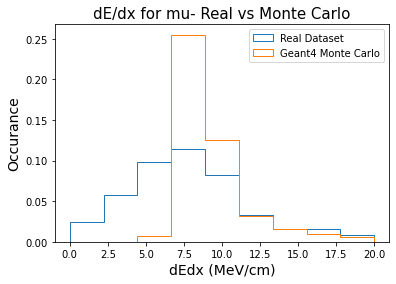

In [239]:

large_non_sats = []
for c in data.get_clusterdf()['Cluster'].values:
    cluster = data.get_cluster(c)
    r2 = data.get_clusterdf()[data.get_clusterdf()['Cluster'] == c]['dEdx_err'].values[0]
    
    if len(cluster[(cluster['IsSaturated']==False) & (cluster['Hit'])==True]) >=4 and r2 > .5:
        large_non_sats.append(c)

np.array(large_non_sats)

non_sat_df = data.get_clusterdf()[data.get_clusterdf()['Cluster'].isin(large_non_sats)]

#array = plt.hist(non_sat_df['dEdx'], np.linspace(0,2000,20), histtype='step')
array = plt.hist(non_sat_df['dEdx']/100, np.linspace(0,20,10),histtype='step', density=True, label='Real Dataset')
#plt.axvline(811, color='black', label='dE/dx=8.11 MeV/cm')

#plt.title("\"Large\" Num (>3) of Non-Sat Clusters")
#plt.xlabel("dEdx (KeV/mm)")
#plt.ylabel("Occurance")
#plt.legend()

array = plt.hist(dEdxs, np.linspace(0,20,10), histtype='step', density=True, label="Geant4 Monte Carlo")
plt.title("dE/dx for mu- Real vs Monte Carlo", fontsize=15)
plt.xlabel("dEdx (MeV/cm)", fontsize=14)
plt.ylabel("Occurance", fontsize=14)
plt.legend()
#plt.yscale("log")


Text(0, 0.5, 'Occurance')

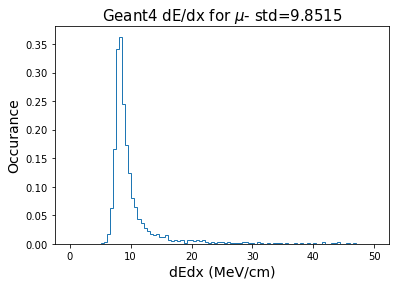

In [240]:
array = plt.hist(dEdxs, np.linspace(0,50,100), histtype='step', density=True)
plt.title("Geant4 dE/dx for $\mu$- std="+str(round(np.std(dEdxs),4)), fontsize=15)
plt.xlabel("dEdx (MeV/cm)", fontsize=14)
plt.ylabel("Occurance", fontsize=14)
#plt.yscale("log")

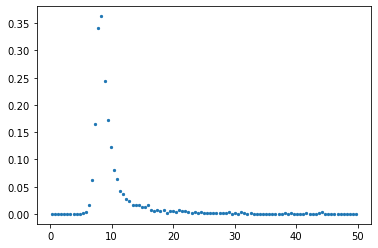

In [241]:
bins = np.array([(array[1][i] + array[1][i+1])/2 for i in range(len(array[1]) - 1)])
values = array[0]

plt.scatter(bins, values, s=5)


In [242]:
with open("./data/pdf/pdf_bins.csv", "w") as f:
    np.savetxt(f, bins, delimiter=",")
with open("./data/pdf/pdf_values.csv", "w") as f:
    np.savetxt(f, values, delimiter=",")

Text(0.5, 0, 'dE/dx (MeV/cm)')

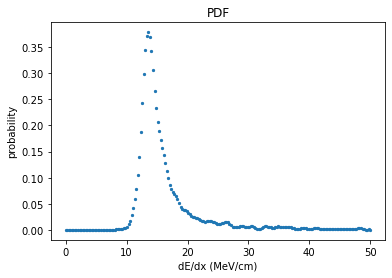

In [243]:
from scipy.interpolate import CubicSpline


def make_pdf():
    
    pwd = '.'
    bins = np.genfromtxt(pwd + '/data/pdf/pdf_bins.csv', delimiter=',')
    values = np.genfromtxt(pwd + '/data/pdf/pdf_values.csv', delimiter=',')
    
    bin_width = bins[1] - bins[0]
    
    #print(bins)
    #print(values)
    
    spline = CubicSpline(bins, values)
    
    def pdf(x):
        
        try:
            out = []
            for i in x:
                if i > 1 and i < 30:
                    out.append(spline(i))
                else:
                    out.append(0)
            return out
        except:
            return spline(x)

        #return list(map(lambda i: spline(i) if i > 1 and i < 30 else 0, x))
    
    return pdf





g = make_pdf()





plt.scatter(np.linspace(0,50,200), g(np.linspace(0,30,200)), s=5)
plt.title("PDF")
plt.ylabel("probability")
plt.xlabel("dE/dx (MeV/cm)")

In [244]:
bins

array([ 0.25252525,  0.75757576,  1.26262626,  1.76767677,  2.27272727,
        2.77777778,  3.28282828,  3.78787879,  4.29292929,  4.7979798 ,
        5.3030303 ,  5.80808081,  6.31313131,  6.81818182,  7.32323232,
        7.82828283,  8.33333333,  8.83838384,  9.34343434,  9.84848485,
       10.35353535, 10.85858586, 11.36363636, 11.86868687, 12.37373737,
       12.87878788, 13.38383838, 13.88888889, 14.39393939, 14.8989899 ,
       15.4040404 , 15.90909091, 16.41414141, 16.91919192, 17.42424242,
       17.92929293, 18.43434343, 18.93939394, 19.44444444, 19.94949495,
       20.45454545, 20.95959596, 21.46464646, 21.96969697, 22.47474747,
       22.97979798, 23.48484848, 23.98989899, 24.49494949, 25.        ,
       25.50505051, 26.01010101, 26.51515152, 27.02020202, 27.52525253,
       28.03030303, 28.53535354, 29.04040404, 29.54545455, 30.05050505,
       30.55555556, 31.06060606, 31.56565657, 32.07070707, 32.57575758,
       33.08080808, 33.58585859, 34.09090909, 34.5959596 , 35.10

array(31.106635)

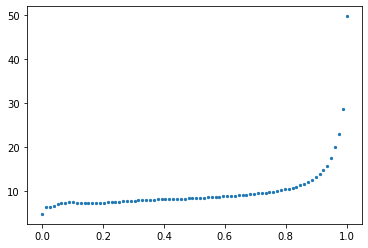

In [245]:
plt.scatter(np.linspace(0,1,80), h(np.linspace(0,1,80)), s=5)

h(.99)

Text(0, 0.5, 'Energy deposited (MeV)')

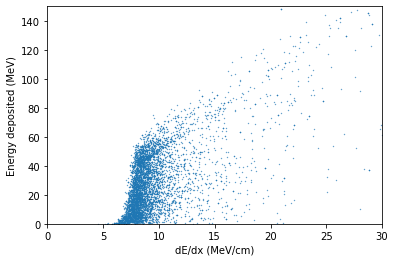

In [246]:
plt.scatter(dEdxs, df['Edep'], s=.1)
plt.ylim(0,150)
plt.xlim(0,30)
plt.xlabel("dE/dx (MeV/cm)")
plt.ylabel("Energy deposited (MeV)")

Text(0, 0.5, 'Energy deposited (MeV)')

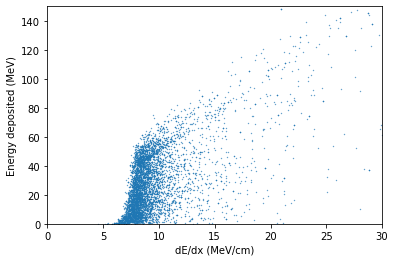

In [247]:
plt.scatter(dEdxs, df['Edep'], s=.1)
plt.ylim(0,150)
plt.xlim(0,30)
plt.xlabel("dE/dx (MeV/cm)")
plt.ylabel("Energy deposited (MeV)")

In [248]:
df[df['Other'] > 0]

,Edep,KE_i,KE_f,Mvec_i,Mvec_f,Pvec_i,Pvec_f,Muons,Electrons,Positrons,Gammas,Other
332,88.712100,3.488738e+05,3.485523e+05,"[0.659425664812339, 0.3708412717478301, -0.653...","[0.6593508396112333, 0.3708251083620187, -0.65...","[-15.601852893425072, 8.999249683042102, 25.0]","[12.85152644655006, 25.0, -3.2190926850768395]",1,34,2,17,1
832,88.712100,3.488738e+05,3.485523e+05,"[0.659425664812339, 0.3708412717478301, -0.653...","[0.6593508396112333, 0.3708251083620187, -0.65...","[-15.601852893425072, 8.999249683042102, 25.0]","[12.85152644655006, 25.0, -3.2190926850768395]",1,34,2,17,1
1332,88.712100,3.488738e+05,3.485523e+05,"[0.659425664812339, 0.3708412717478301, -0.653...","[0.6593508396112333, 0.3708251083620187, -0.65...","[-15.601852893425072, 8.999249683042102, 25.0]","[12.85152644655006, 25.0, -3.2190926850768395]",1,34,2,17,1
2054,14.163844,6.645199e+05,6.645057e+05,"[0.7206733603568125, 0.6838951015611621, -0.11...","[0.7206254770863624, 0.6839233850153877, -0.11...","[-19.608529919407623, 12.69087333266063, 25.0]","[-6.637851821438417, 25.0, 22.95379828990603]",1,0,0,0,1
2611,68.703239,1.470793e+06,1.470570e+06,"[0.19038636414262147, 0.9689044639547243, -0.1...","[0.1903913989820862, 0.9689021575991216, -0.15...","[5.1038537497148475, -7.0008026510842924, 25.0]","[11.392017770956224, 25.0, 19.7800639421093]",1,23,1,13,1
3783,671.894017,2.234364e+06,2.230534e+06,"[0.6181929405942368, -0.49357683061236585, -0....","[0.6181999801457747, -0.4935500300431666, -0.6...","[-20.430875940600025, 8.1027110637826, 25.0]","[21.030002607751722, -25.0, -16.02844341089323]",1,302,21,142,1
3868,152.731430,6.955052e+05,6.949965e+05,"[0.4776783216766147, 0.8260392978383048, -0.29...","[0.477683736357972, 0.8260269932880312, -0.299...","[-19.547137823126864, -2.7468938664200877, 25.0]","[-3.501546547778819, 25.0, 14.95198981275227]",1,68,4,36,1
4444,157.849412,1.390446e+06,1.390158e+06,"[-0.26830520926755336, 0.4048425322519538, -0....","[-0.2683128064763285, 0.4048522601913075, -0.8...","[8.55750024470455, 3.422819192054977, 25.0]","[-5.743096822111306, 25.0, -21.589303259938312]",1,73,5,42,1
4711,241.908672,1.350057e+06,1.349204e+06,"[0.18072843870491503, -0.3779425716890692, -0....","[0.18073264841469938, -0.37792942279172637, -0...","[4.309563347684474, 0.8016303026259557, 25.0]","[14.261446896950769, -20.009807336776955, -25.0]",1,127,6,55,1
5311,163.956135,2.560774e+06,2.560070e+06,"[0.9655447558363269, -0.11403201500647324, -0....","[0.9655441458169967, -0.11403059781498535, -0....","[3.820040644508264, 11.501927417669727, 25.0]","[25.0, 9.00061386058077, 19.868697311676904]",1,6,0,4,6


Text(0, 0.5, 'Occurance')

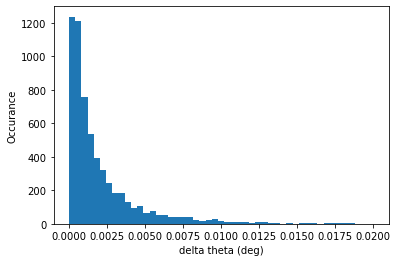

In [249]:
import math
deltas = []
#cut_df = df[300000 - df['KE_f'] - df['Edep'] > 1e3]
for i, f in zip(df['Mvec_i'].values, df['Mvec_f'].values):
    th = math.acos(np.dot(i,f) / (np.linalg.norm(i) * np.linalg.norm(f)))
    deltas.append(th * 180 / np.pi)
    
array = plt.hist(deltas, np.linspace(0.00, 0.02, 50))
plt.xlabel("delta theta (deg)")
plt.ylabel("Occurance")
#plt.xscale("log")

(100000.0, 10000000.0)

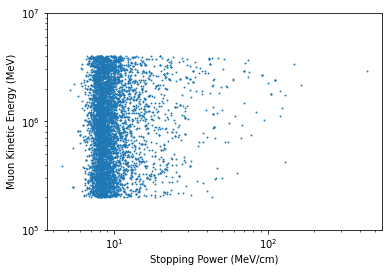

In [250]:
plt.scatter(dEdxs, df['KE_i'], s=.8)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Stopping Power (MeV/cm)")
plt.ylabel("Muon Kinetic Energy (MeV)")
plt.ylim(1e5, 1e7)

In [254]:
df

,Edep,KE_i,KE_f,Mvec_i,Mvec_f,Pvec_i,Pvec_f,Muons,Electrons,Positrons,Gammas,Other
1,46.676206,4.766068e+05,4.765601e+05,"[-0.03621493096894713, -0.08811986606814279, -...","[-0.0360796588645523, -0.08810125812010022, -0...","[16.874006718742244, -7.188996696354696, 25.0]","[15.056034809712706, -11.614001507520468, -25.0]",1,3,0,0,0
2,18.723285,4.088516e+05,4.088323e+05,"[0.8072531728241551, 0.5118198834065653, -0.29...","[0.8072472482355533, 0.5118324983749759, -0.29...","[-5.615944347048636, 16.983886465088787, 25.0]","[7.027351861366402, 25.0, 20.396724426855226]",1,4,0,2,0
3,49.086445,4.242320e+05,4.241829e+05,"[-0.0021198172599941876, 0.5087345223394355, -...","[-0.00218503002244043, 0.5087736643389881, -0....","[22.367437287397465, -16.323325307473148, 25.0]","[22.24341877346876, 13.224197756638679, -25.0]",1,5,0,1,0
4,15.064617,2.797695e+06,2.797680e+06,"[-0.6643176377373599, -0.4446706170905417, -0....","[-0.6643158694562176, -0.4446780775059189, -0....","[8.876572687516244, -16.499074785607547, 25.0]","[-3.823422184996941, -25.0, 13.514461635814316]",1,0,0,0,0
5,40.978561,1.000000e+03,9.586402e+02,"[0.9093745197477361, -0.003527766924621263, -0...","[0.9077886065355514, -0.01740767783553255, -0....","[-18.47548047118891, 5.887555301760905, 25.0]","[25.0, 5.569693267314318, 4.8630877200554]",1,7,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6015,77.182093,3.051930e+06,3.051613e+06,"[0.63958461789877, -0.35520209534147906, -0.68...","[0.6395758101589941, -0.3552000998421873, -0.6...","[-13.253742872843782, 24.353051140554115, 25.0]","[25.0, 3.108301679396467, -15.775113883221078]",1,20,1,9,0
6016,2.411752,1.392426e+06,1.392424e+06,"[-0.8499401029746947, 0.472246856471181, -0.23...","[-0.8499408060090798, 0.47224688540937754, -0....","[-22.368613026589234, -21.112732539082305, 25.0]","[-25.0, -19.650671598548655, 24.276677500899947]",1,0,0,0,0
6017,2.810997,1.708653e+06,1.708650e+06,"[-0.5867833824031218, -0.4149466560664428, -0....","[-0.5867790582165054, -0.4149481551298431, -0....","[-23.289694722256975, -23.677334110438487, 25.0]","[-25.0, -24.886784611483353, 22.97326902245779]",1,0,0,0,0
6018,35.087499,9.048215e+05,9.047864e+05,"[-0.5140414932925528, 0.17576400646177576, -0....","[-0.5140470816596154, 0.17577592974690323, -0....","[18.560662430032608, 17.57873718485, 25.0]","[-3.14345900957408, 25.0, -10.448435069533868]",1,4,0,1,0


In [251]:
# check anything else that could possibly be relevant to dE/dx. Angle for example?

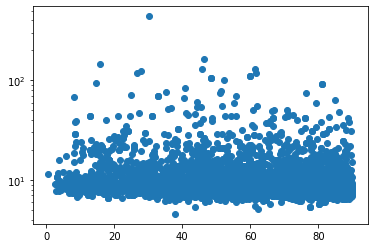

In [252]:
thetas = []
for v in df['Mvec_i'].values:
    th = math.acos(v.dot(np.array([0,0,-1])) / np.linalg.norm(v)) * 180 / np.pi
    thetas.append(th)
    
plt.scatter(thetas, dEdxs)
plt.yscale('log')

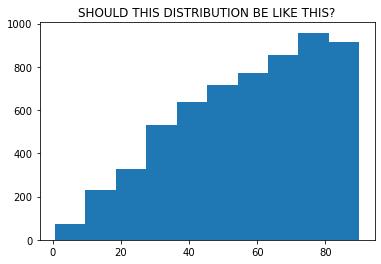

In [253]:
plt.hist(thetas)
array = plt.title("SHOULD THIS DISTRIBUTION BE LIKE THIS?")